![TWD](images/twd_flag.jfif)


# Taiwanese Bankruptcy Prediction

Authors: Ramil and Erin

Image: Reuters

## Overview

We will be using data from the Taiwan Economic Journal on company financial statuses from 1999 to 2009. Our target variable is if a company went bankrupt or not. We have a long list of predictors such as Gross profit, operating income, taxes, and many other features listed below. 


## Business Problem

Our stakeholder is an overseas investor/hedge fund looking to invest in companies operating in Taiwan. Our business problem is to predict if a company will go bankrupt in order to advise our stakeholder on whether or not they should decide to invest. It is imperative that we do not mistakenly miss companies that are falling under as it would result in financial losses. In order to better catch companies that are going to fail, we will need to minimize our false negatives.

## Data Understanding

Below we will import the libraries we used in this notebook and then import and display the data.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve, auc
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import xgboost

In [2]:
df = pd.read_csv('data/data.csv')

In [101]:
def add_precision_score(model, x):
    precision_scores = {}
    
    precision_scores[model] = {'Train:':precision_score(y_train, model.predict(x)), 'Test':0}
    return precision_scores

In [103]:
add_precision_score(rfc_best_balance, X_train_top_10)

NameError: name 'rfc_best_balance' is not defined

In [104]:
precision_score_rfc_best_balance = precision_score(y_train, rfc_best_balance.predict(X_train_top_10))
precision_scores['Random Forest'] = {'Train':precision_score_rfc_best_balance, 'Test':0}
precision_scores

NameError: name 'rfc_best_balance' is not defined

In [ ]:
df.head() #might need to simplify or regularization techniques

Below we can see that our dataset contains 6819 rows of data and 96 columns.

In [105]:
df.shape

(6819, 95)

In [106]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [107]:
df['Bankrupt?'].value_counts(normalize=True)

0   0.97
1   0.03
Name: Bankrupt?, dtype: float64

- 96% vs 3% - we will need to use an oversampling technique such as SMOTE as well as undersampling.

In [108]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,0.78,1995347312.80,1950427306.06,0.47,16448012.91,0.12,0.19,0.19,0.19,0.23,0.32,1328640.60,0.11,0.18,0.02,0.85,0.69,0.69,0.22,5508096595.25,1566212.06,0.26,0.38,403284.95,8376594.82,0.63,4416336.71,0.11,0.89,0.01,0.37,0.01,0.11,0.18,0.40,0.14,12789705.24,9826220.86,2149106056.61,1008595981.82,0.04,2325854.27,0.40,11255785.32,0.81,0.40,0.52,0.12,3592902.20,37159994.15,0.09,0.35,0.28,55806804.53,0.76,0.74,0.33,54160038.14,0.93,0.00,0.03,1195855763.31,2163735272.03,0.59,2471976967.44,0.67,1220120.50,0.76,0.33,0.12,0.65,0.46,0

We can observe we have quite a few outliers in some columns.

In [109]:
df.info() 
#take some columns and explore
#explore distributions
#more eda
#then add features we think are relevant to see how it performs on log reg or deetree
# look at log loss
#make sure to cross validate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [110]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

- No missing values

## Exploratory Data Analysis

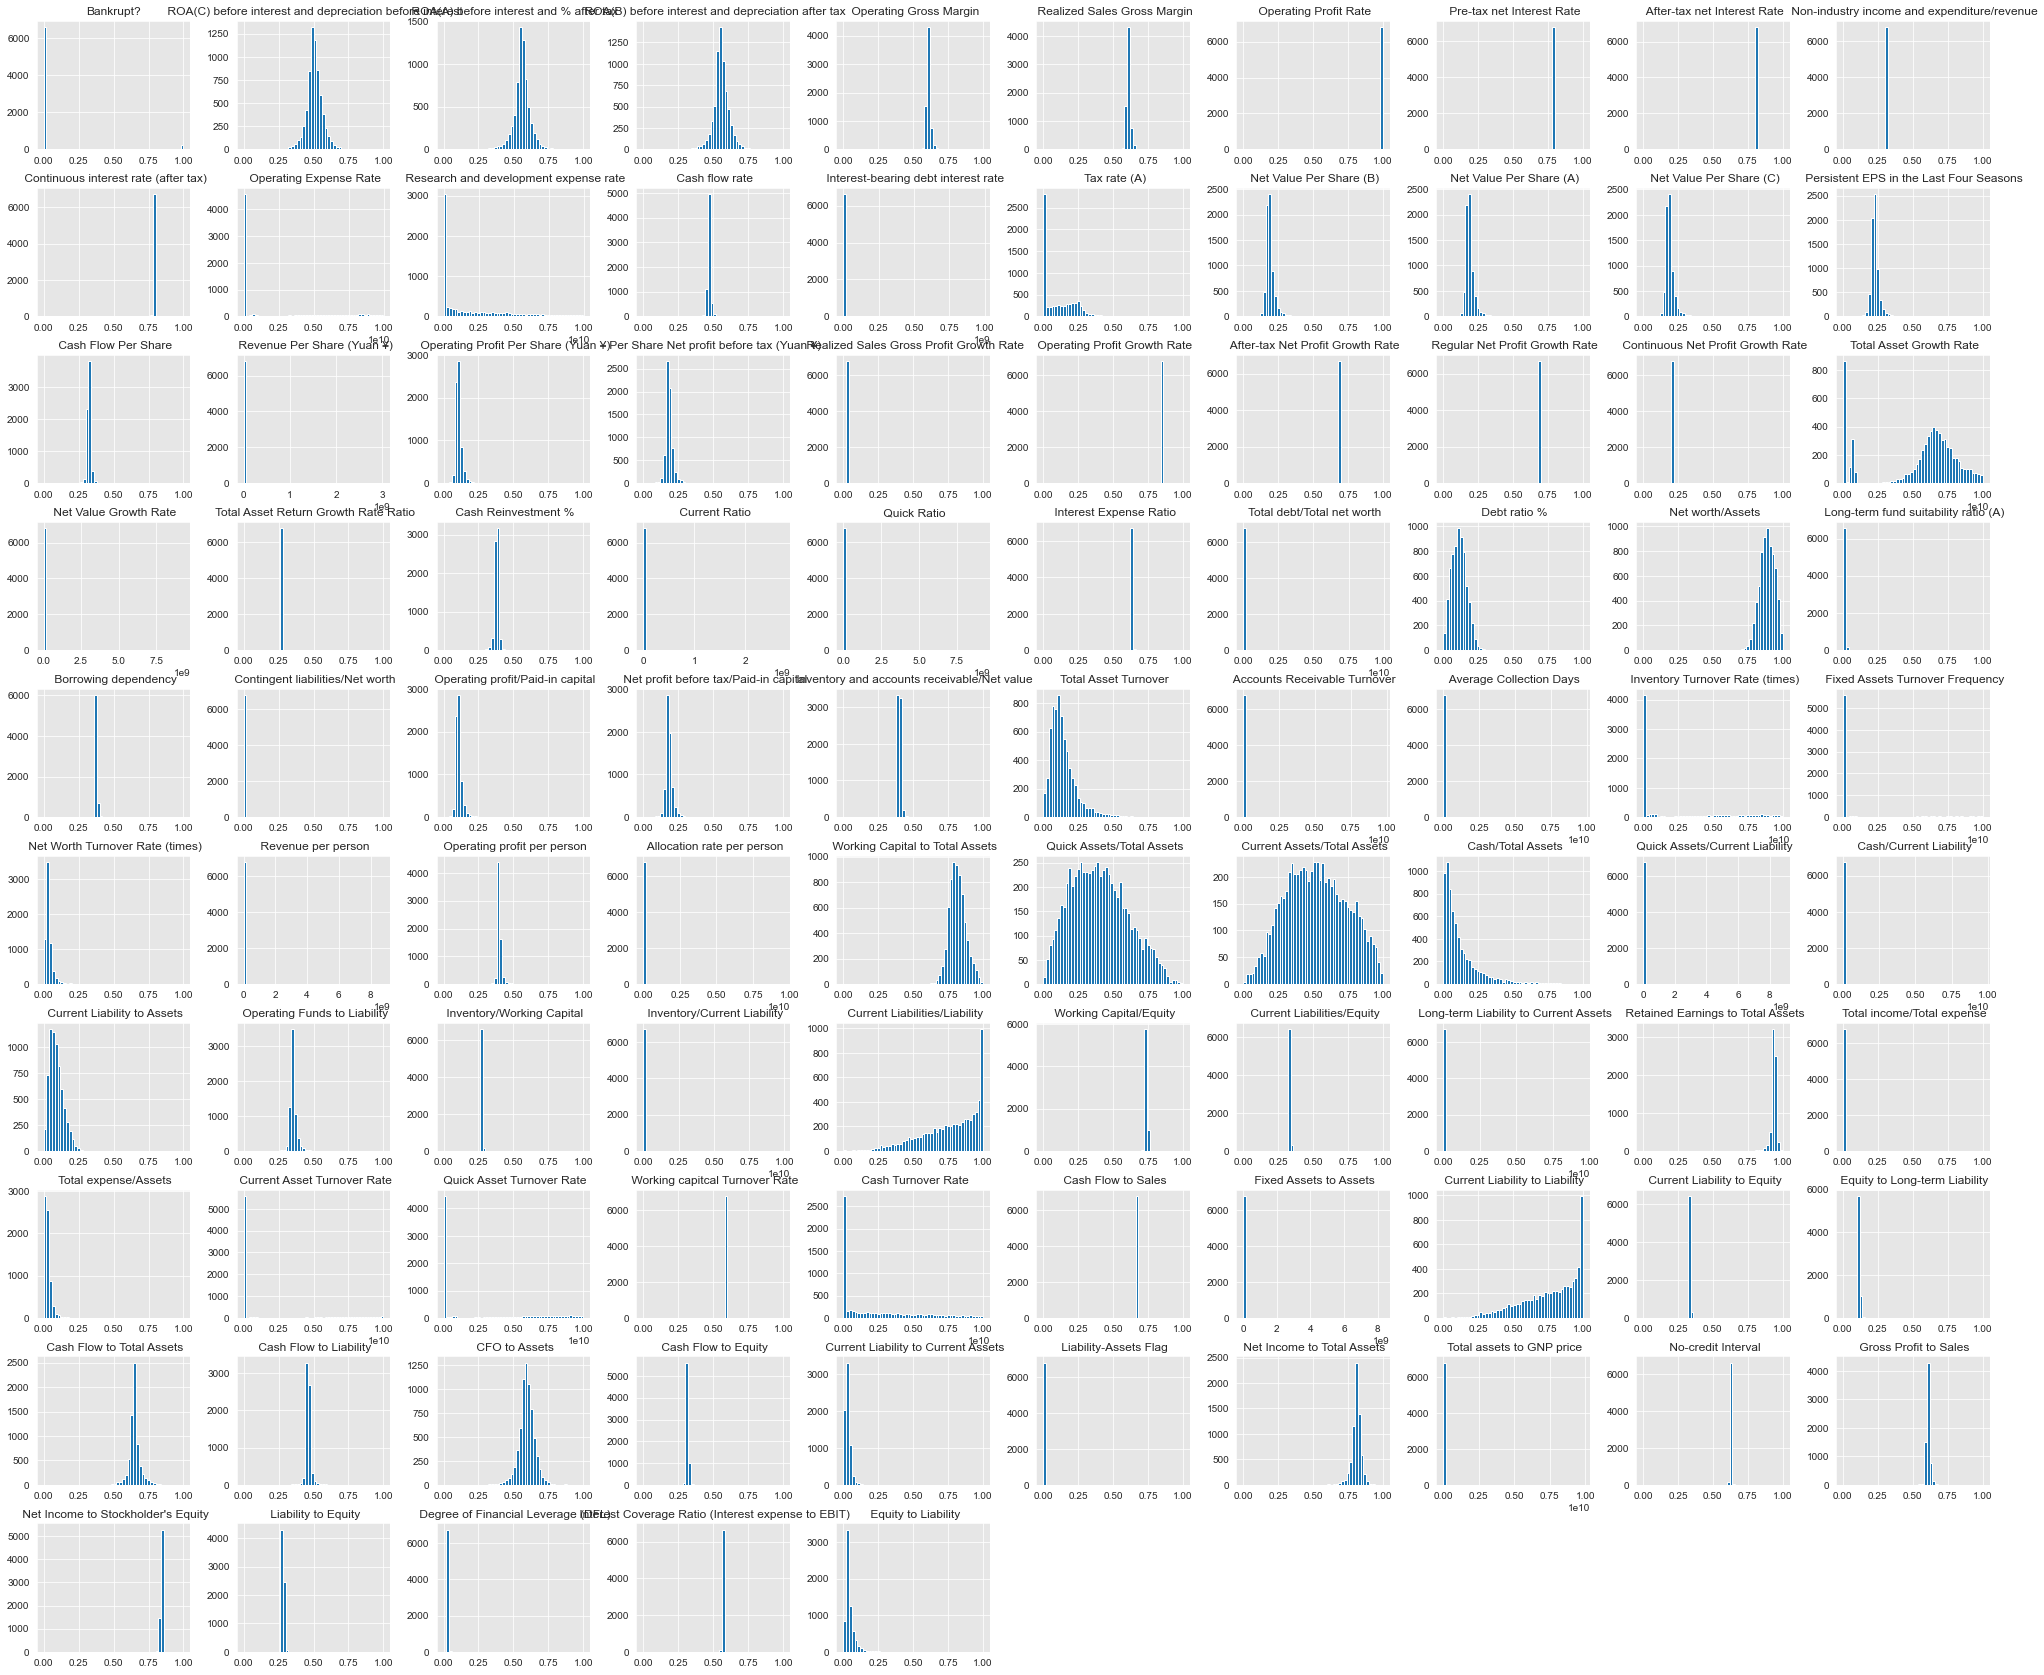

In [111]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

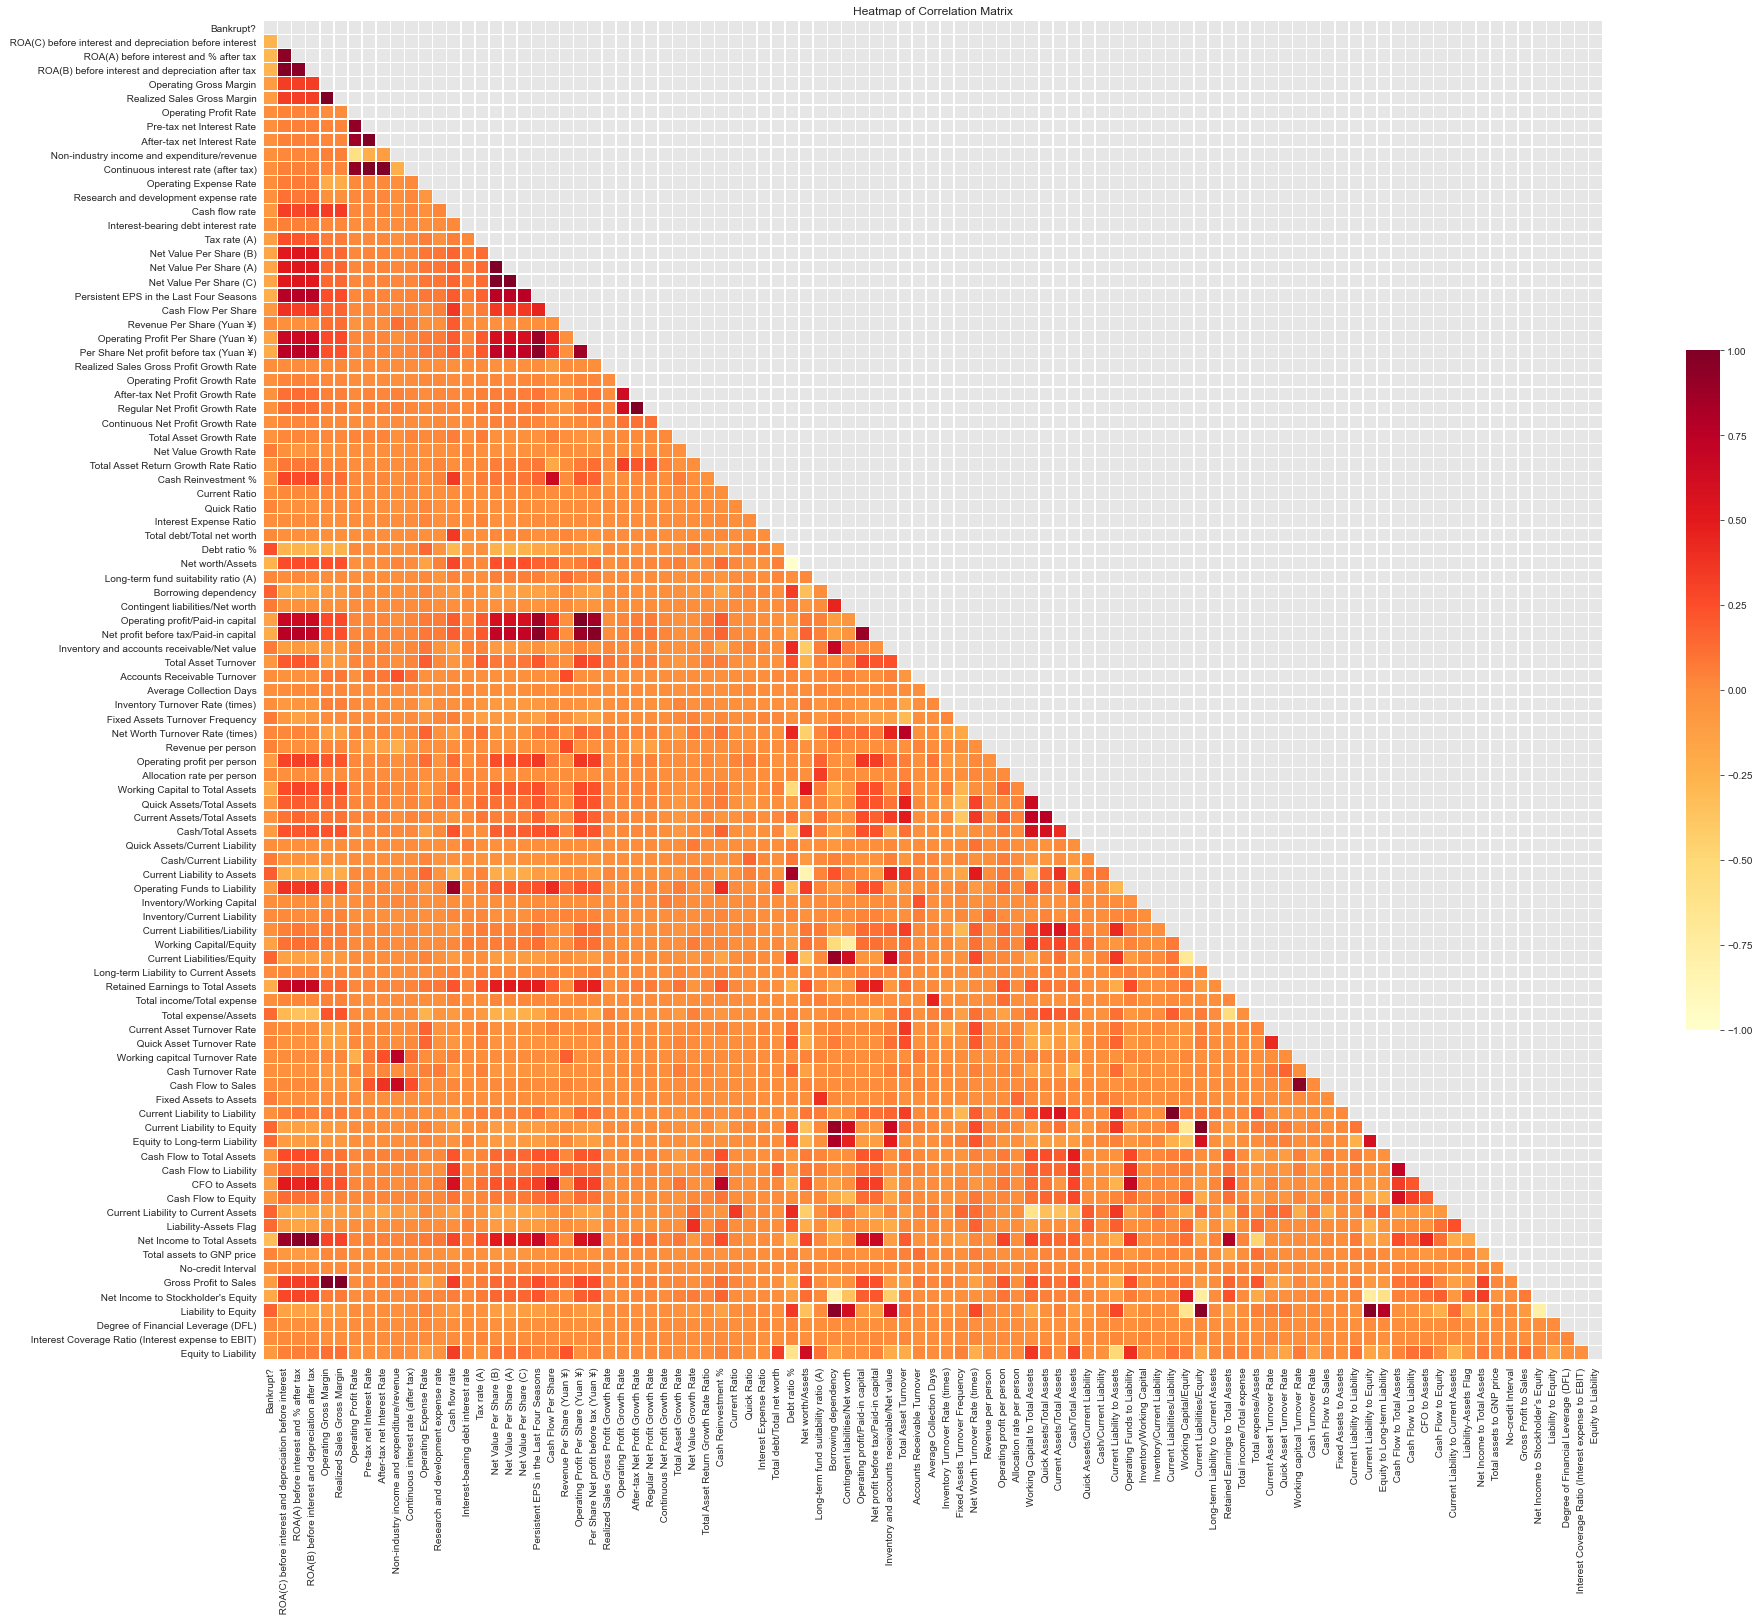

In [112]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(30,25))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax, cmap='YlOrRd', #annot=True, 
            center=0, vmin=-1, vmax=1, square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title("Heatmap of Correlation Matrix");


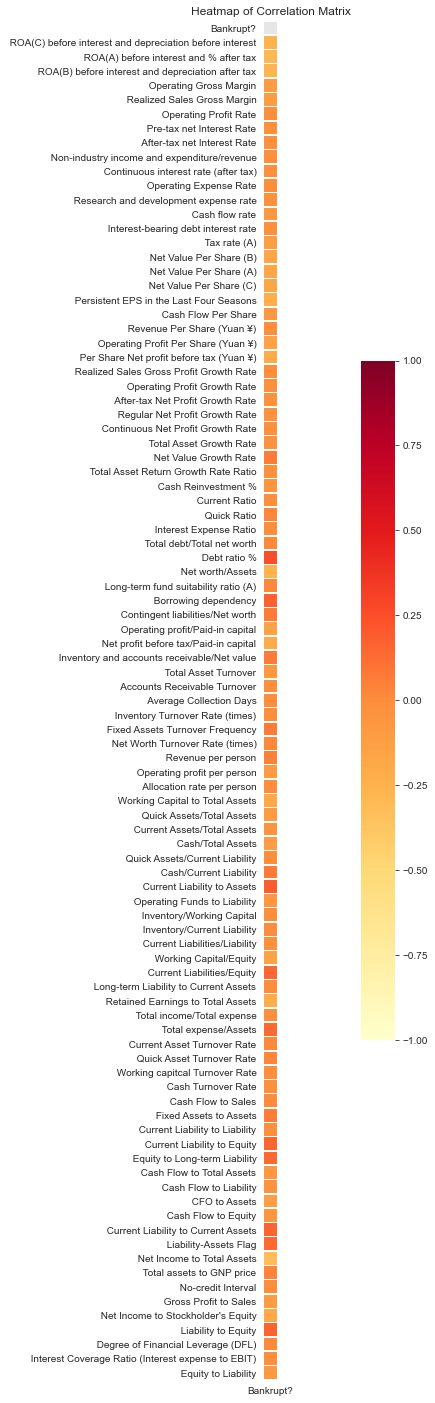

In [113]:
corr2 = df.corr()

fig, ax = plt.subplots(figsize=(30,25))

sns.heatmap(data=corr2[['Bankrupt?']], mask=np.triu(np.ones_like(corr2[['Bankrupt?']], dtype=bool)),
            ax=ax, cmap='YlOrRd', #annot=True, 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title("Heatmap of Correlation Matrix");


In [114]:
df.iloc[:, 94:95].value_counts()

 Equity to Liability
1.00                    1
0.03                    1
0.03                    1
0.03                    1
0.03                    1
                       ..
0.04                    1
0.04                    1
0.04                    1
0.04                    1
0.00                    1
Length: 6819, dtype: int64

- all values are 1 so we'll drop Net Income Flag

In [115]:
df.drop(' Net Income Flag', axis=1, inplace=True)

KeyError: "[' Net Income Flag'] not found in axis"

#### Exploring outliers using boxplot

In [ ]:
fig,ax = plt.subplots(figsize = (20,20))

ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bankrupt Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()


#### Removing outliers

In [ ]:
def eli_outliers(col, col_name, df):
    print(col_name)
    q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
    iqr = q75 - q25
    print(f"Q25 is {q25} and Q75 is {q75} | iqr is {iqr}")
    
    cutoff = iqr * 1.5
    lower_cutoff, upper_cutoff = q25 - cutoff, q75 + cutoff
    print(f"Cutoff is {cutoff} | Lower is {lower_cutoff} and Upper is {upper_cutoff}")
    
    outliers = [x for x in col if (x<lower_cutoff) or (x>upper_cutoff)]
    print(f"Number of outliers is {len(outliers)}")
    
    df = df.drop(df[(df[col_name] > upper_cutoff) | (df[col_name] < lower_cutoff)].index)
    print('-' * 65)
    
    return df

In [ ]:
for col in df:
    df_cleaned = eli_outliers(df[col], str(col), df)


In [ ]:
print(df_cleaned['Bankrupt?'].value_counts())
print(f'Shape {df_cleaned.shape}')

In [ ]:
fig,ax = plt.subplots(figsize = (20,20))

ax =sns.boxplot(data = df_cleaned, orient="h")
ax.set_title('Bankrupt Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()


#### Exploring features containing debt or cash in the feature name as we have 96 columns and want to isolate ones we think are relevant

In [ ]:
matches = ["debt"]
debt_col = [col for col in df_cleaned.columns if any(x in col.lower() for x in matches)]
debt_col

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax = sns.boxplot(x='Bankrupt?', y=' Interest-bearing debt interest rate', data=df_cleaned, ax=ax1)
ax = sns.boxplot(x='Bankrupt?', y=' Total debt/Total net worth', data=df_cleaned, ax=ax2)
ax = sns.boxplot(x='Bankrupt?', y=' Debt ratio %', data=df_cleaned, ax=ax3)

In [ ]:
plt.figure(figsize=(20, 9))

plt.subplot(1, 3, 1)
ax1 = df_cleaned[df_cleaned['Bankrupt?'] == 0][' Interest-bearing debt interest rate'].hist(bins=50, color='blue', label='No', alpha=0.6)
ax1 = df_cleaned[df_cleaned['Bankrupt?'] == 1][' Interest-bearing debt interest rate'].hist(bins=50, color='red', label='Yes', alpha=0.6)
ax1.set_title('Interest-bearing debt')

plt.subplot(1, 3, 2)
ax2 = df_cleaned[df_cleaned['Bankrupt?'] == 0][' Total debt/Total net worth'].hist(bins=50, color='blue', label='No', alpha=0.6)
ax2 = df_cleaned[df_cleaned['Bankrupt?'] == 1][' Total debt/Total net worth'].hist(bins=50, color='red', label='Yes', alpha=0.6)
ax2.set_title('Total Debt/Total Net Worth')

plt.subplot(1, 3, 3)
ax3 = df_cleaned[df_cleaned['Bankrupt?'] == 0][' Debt ratio %'].hist(bins=50, color='blue', label='No', alpha=0.6)
ax3 = df_cleaned[df_cleaned['Bankrupt?'] == 1][' Debt ratio %'].hist(bins=50, color='red', label='Yes', alpha=0.6)
ax3.set_title('Debt Ratio')
ax1.legend()
ax2.legend()
ax3.legend()

In [ ]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate([' Interest-bearing debt interest rate', ' Total debt/Total net worth', ' Debt ratio %']):
    
    # create a new subplot for each feature
    plt.subplot(4, 1, i + 1)
    
    ax = sns.kdeplot(df_cleaned.loc[df_cleaned['Bankrupt?'] == 0, feature], label = 'Bankrupt == 0')
    ax = sns.kdeplot(df_cleaned.loc[df_cleaned['Bankrupt?'] == 1, feature], label = 'Bankrupt == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Bankruptcy' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    ax.legend()
    
plt.tight_layout(h_pad = 2.5)


#### Exploring top correlating features

In [ ]:
top_cor_col = corr2[["Bankrupt?"]].apply(abs).sort_values('Bankrupt?', ascending=False).iloc[1:11,:].index
list(top_cor_col)

In [ ]:
fig, ax = plt.subplots(figsize=(40,20), ncols=2, nrows=5)

colors = ['#3BB143', '#0B6633', '#9DC183', '#708238', '#C7EA46',
          '#3F704D', '#00A86B', '#8F9779', '#4F7942', '#29AB87']

for i, column in enumerate(df_cleaned[list(top_cor_col)]):
    sns.histplot(df_cleaned[column], ax=ax[i//2, i%2], kde=True, color=colors[i])
    ax[i//2, i%2].set_title('\n' + column + '\n')

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10), ncols=5, nrows=2)

for i, col in enumerate(df_cleaned[list(top_cor_col)]):
    sns.boxplot(x='Bankrupt?', y=col, data=df, ax=ax[i//5, i%5])

#### Distribution of the 10 features of 5 of the companies that went bankrupt

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(24, 6))
colors2 = ['#FB8861', '#56F9BB', '#C5B3F9', '#8F9779', '#bf40bf']

for i, col in enumerate(df_cleaned[list(top_cor_col[:5])]):
    bankrupt = df_cleaned[col].loc[df_cleaned['Bankrupt?'] == 1].values
    sns.histplot(bankrupt, ax=ax[i], kde=True, color=colors2[i])
    ax[i].set_title(col + '\n (Bankruptcy Companies)', fontsize=10)


In [ ]:
fig, ax = plt.subplots(1,5, figsize=(24, 6))
colors2 = ['#FB8861', '#56F9BB', '#C5B3F9', '#8F9779', '#bf40bf']

for i, col in enumerate(df_cleaned[list(top_cor_col[5:])]):
    bankrupt = df_cleaned[col].loc[df_cleaned['Bankrupt?'] == 1].values
    sns.histplot(bankrupt, ax=ax[i], kde=True, color=colors2[i])
    ax[i].set_title(col + '\n (Bankruptcy Companies)', fontsize=10)


### Splitting the Data

In [ ]:
X = df_cleaned.drop('Bankrupt?', axis=1)
y = df_cleaned['Bankrupt?']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=4, 
                                                    stratify=y, 
                                                    test_size=.2)

### First logistic regression model with debt/liability features 

#### Subsetting the training data with the debt and liability features

In [ ]:
X_train_debt = X_train[debt_col]
X_test_debt = X_test[debt_col]

In [ ]:
debt_steps = [('ss', StandardScaler()),
             ('debt', LogisticRegression(random_state=4))]

In [ ]:
debt_pipeline = Pipeline(debt_steps)
debt_pipeline.fit(X_train_debt, y_train)

In [ ]:
plot_confusion_matrix(debt_pipeline, X_train_debt, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
confusion_matrix(y_train, debt_pipeline.predict(X_train_debt))

In [ ]:
print(classification_report(y_train, debt_pipeline.predict(X_train_debt)))

#### Our baseline model f1 score

In [ ]:
f1_scores = {}
f1_scores['baseline'] = f1_score(y_train, debt_pipeline.predict(X_train_debt))
f1_scores

In [ ]:
debt_cv = cross_validate(debt_pipeline, X_train_debt, y_train, cv=5, n_jobs=-1, scoring=['neg_log_loss', 'roc_auc'])
debt_cv

In [ ]:
debt_score = debt_pipeline.decision_function(X_train_debt)
fpr_debt, tpr_debt, thresholds_debt = roc_curve(y_train, debt_score)
print('AUC: {}'.format(auc(fpr_debt, tpr_debt)))

In [ ]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score AUC: {:.4f}'.format(auc(fpr_debt, tpr_debt)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Analysis of our Logistic Regression model using debt/liability features
In this model, we were able to achieve a precision score of 97% for our 0 class/not bankrupt and a 60% for our 1 class/bankrupt. We will further explore other features that are correlated with our target to see if our model improves. 

### Logistic Regression Model with top 10 features

#### Subsetting the training data with the top 10 features

In [ ]:
X_train_top_10 = X_train[top_cor_col]
X_test_top_10 = X_test[top_cor_col]

In [ ]:
top_10_steps = [('ss', StandardScaler()),
             ('top_10', LogisticRegression(random_state=4))]

In [ ]:
top_10_pipeline = Pipeline(top_10_steps)
top_10_pipeline.fit(X_train_top_10, y_train)

In [ ]:
plot_confusion_matrix(top_10_pipeline, X_train_top_10, y_train)

In [ ]:
confusion_matrix(y_train, top_10_pipeline.predict(X_train_top_10))

In [ ]:
print(classification_report(y_train, top_10_pipeline.predict(X_train_top_10)))

In [ ]:
f1_scores['top_10'] = f1_score(y_train, top_10_pipeline.predict(X_train_top_10))
f1_scores

In [ ]:
top_10_cv = cross_validate(top_10_pipeline, X_train_top_10, y_train, cv=5, n_jobs=-1, scoring=['neg_log_loss', 'roc_auc'])

In [ ]:
top_10_cv

In [ ]:
top_10_score = top_10_pipeline.decision_function(X_train_top_10)
fpr_top_10, tpr_top_10, thresholds_top_10 = roc_curve(y_train, top_10_score)
print('Top 10 AUC: {}'.format(auc(fpr_top_10, tpr_top_10)))

In [ ]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_top_10, tpr_top_10, color='darkorange', label='Top 10 Score: {:.4f}'.format(auc(fpr_top_10, tpr_top_10)))
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score: {:.4f}'.format(auc(fpr_debt, tpr_debt)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Analysis of first model with top 10 features
Our AUC curve and f1 scores increased in this model and we were able to achieve a precision score of 97% for our 0 class and dropped to 49% for our 1 class. This might be due to the imbalance in the dataset which we will explore next.

#### 3rd Model: class weight

In [ ]:
cw_steps = [('ss', StandardScaler()),
             ('cw', LogisticRegression(random_state=4))]

In [ ]:
cw_pipeline = Pipeline(cw_steps)
cw_pipeline.fit(X_train_top_10, y_train)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5,
                                  shuffle=True,
                                  random_state=4)
weights = np.linspace(0.0,0.99,200)


In [ ]:
cw_grid = {'cw__class_weight':[{0:x, 1:1.0-x} for x in weights]}

In [ ]:
cw_grid_search = GridSearchCV(estimator=cw_pipeline,
                                param_grid=cw_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                cv=stratified_kfold,
                                n_jobs=-1,
                                refit='f1')

In [ ]:
cw_grid_search.fit(X_train_top_10, y_train)

In [ ]:
cw_grid_search.best_params_

In [ ]:
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': cw_grid_search.cv_results_['mean_test_f1'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)


In [ ]:
best_cw_steps = [('ss', StandardScaler()),
             ('cw', LogisticRegression(random_state=4, class_weight={0: 0.13432160804020102, 1: 0.865678391959799}))]

In [ ]:
best_cw_pipeline = Pipeline(best_cw_steps)
best_cw_pipeline.fit(X_train_top_10, y_train)

In [ ]:
confusion_matrix(y_train, best_cw_pipeline.predict(X_train_top_10))

In [ ]:
print(classification_report(y_train, best_cw_pipeline.predict(X_train_top_10)))

In [ ]:
f1_scores['cw'] = f1_score(y_train, best_cw_pipeline.predict(X_train_top_10))
f1_scores

### 4th model with over and under sampling with top 10 features

In [ ]:
over_steps = [('smote', SMOTE(random_state=4)),
             ('ss', StandardScaler()),
             ('over', LogisticRegression(random_state=4))]

under_steps = [('undie', RandomUnderSampler(random_state=4)),
              ('ss', StandardScaler()),
              ('under', LogisticRegression(random_state=4))]

In [ ]:
over_pipeline = imbpipeline(over_steps)
under_pipeline = imbpipeline(under_steps)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5,
                                  shuffle=True,
                                  random_state=4)

In [ ]:
over_param_grid = {'over__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

under_param_grid = {'under__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [ ]:
over_grid_search = GridSearchCV(estimator=over_pipeline,
                                param_grid=over_param_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                cv=stratified_kfold,
                                n_jobs=-1,
                                refit='f1')

In [ ]:
under_grid_search = GridSearchCV(estimator=under_pipeline,
                                 param_grid=under_param_grid,
                                 scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                 cv=stratified_kfold,
                                 n_jobs=-1,
                                 refit='f1')

In [ ]:
over_grid_search.fit(X_train_top_10, y_train)

In [ ]:
under_grid_search.fit(X_train_top_10, y_train)

In [ ]:
confusion_matrix(y_train, over_grid_search.predict(X_train_top_10))


In [ ]:
confusion_matrix(y_train, under_grid_search.predict(X_train_top_10))

In [ ]:
f1_scores['over'] = f1_score(y_train, over_grid_search.predict(X_train_top_10))
f1_scores['under'] = f1_score(y_train, under_grid_search.predict(X_train_top_10))
f1_scores

We can see that our over and under sampling methods yielded a lower f1 score than our class weight parameter and we'll proceed with using that parameter.

In [ ]:
over_cv_score = over_grid_search.best_score_
under_cv_score = under_grid_search.best_score_
print(f'Over Cross-validation score: {over_cv_score}')
print(f'Under Cross-validation score: {under_cv_score}')

In [ ]:
over_score = over_grid_search.decision_function(X_train_top_10)
fpr_over, tpr_over, thresholds_over = roc_curve(y_train, over_score)
under_score = under_grid_search.decision_function(X_train_top_10)
fpr_under, tpr_under, thresholds_under = roc_curve(y_train, under_score)
print('Over AUC: {}'.format(auc(fpr_over, tpr_over)))
print('Under AUC: {}'.format(auc(fpr_under, tpr_under)))

In [ ]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score: {:.4f}'.format(auc(fpr_debt, tpr_debt)))
ax.plot(fpr_top_10, tpr_top_10, color='darkorange', label='Top 10 Score: {:.4f}'.format(auc(fpr_top_10, tpr_top_10)))
ax.plot(fpr_over, tpr_over, color='blue', label='Over Score: {:.4f}'.format(auc(fpr_over, tpr_over)))
ax.plot(fpr_under, tpr_under, color='green', label='Under Score: {:.4f}'.format(auc(fpr_under, tpr_under)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## f1 score good for class imbalance <--- this the one
- log loss can be informative for probabalistic 
- 

In [ ]:
 add_percision_score(all_pipeline, X_train)

### Fourth model with all predictors using our best parameters and under sampling

In [ ]:
all_steps = [('ss', StandardScaler()),
              ('all', LogisticRegression(random_state=4, class_weight={0: 0.13432160804020102, 1: 0.865678391959799}))]

In [ ]:
all_pipeline = Pipeline(all_steps)

In [ ]:
all_pipeline.fit(X_train, y_train)

In [ ]:
all_cv = cross_validate(all_pipeline, 
                        X_train, y_train, 
                        scoring=['roc_auc', 'neg_log_loss', 'f1'], 
                        cv=stratified_kfold, 
                        n_jobs=-1)

In [ ]:
all_cv

In [ ]:
confusion_matrix(y_train, all_pipeline.predict(X_train))

In [ ]:
f1_scores['all'] = f1_score(y_train, all_pipeline.predict(X_train))
f1_scores

In [ ]:
all_param_grid = {'all__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
all_gridsearchcv = GridSearchCV(all_pipeline, 
                                X_train, y_train,
                                param_grid=all_param_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'], 
                                cv=stratified_kfold, 
                                n_jobs=[-1],
                                refit='f1')

In [ ]:
all_cv

In [ ]:
plot_confusion_matrix(all_pipeline, X_train, y_train)

In [ ]:
all_score = all_pipeline.decision_function(X_train)
fpr_all, tpr_all, thresholds_all = roc_curve(y_train, all_score)
print('All AUC: {}'.format(auc(fpr_all, tpr_all)))

In [ ]:
print(classification_report(y_train, all_pipeline.predict(X_train)))

In [ ]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score: {:.4f}'.format(auc(fpr_debt, tpr_debt)))
ax.plot(fpr_top_10, tpr_top_10, color='darkorange', label='Top 10 Score: {:.4f}'.format(auc(fpr_top_10, tpr_top_10)))
ax.plot(fpr_over, tpr_over, color='blue', label='Over Score: {:.4f}'.format(auc(fpr_over, tpr_over)))
ax.plot(fpr_under, tpr_under, color='green', label='Under Score: {:.4f}'.format(auc(fpr_under, tpr_under)))
ax.plot(fpr_all, tpr_all, color='yellow', label='All Score: {:.4f}'.format(auc(fpr_all, tpr_all)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forests

#### Balanced Random Forest Classifier

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
brfc = BalancedRandomForestClassifier(n_estimators=10)

In [ ]:
b_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)

In [ ]:
scores = cross_validate(brfc, X_train, y_train, scoring=['roc_auc', 'neg_log_loss', 'f1'], cv=b_cv, n_jobs=-1,)

In [ ]:
scores

#### Random Forest Model with all Features

In [ ]:
rfc_under_steps = [('rfc', RandomForestClassifier(random_state=4))]

In [ ]:
rfc_under_pipeline = imbpipeline(rfc_under_steps)
rfc_under_pipeline

In [ ]:
rfc_under_param_grid = {'rfc__max_features' : ['auto', 'sqrt', 'log2'],
              'rfc__class_weight' : ['balanced','balanced_subsample'],
              'rfc__criterion' : ['gini', 'entropy'],
              'rfc__bootstrap' : [True,False]}


In [ ]:
rfc_under_gsCV = GridSearchCV(estimator=rfc_under_pipeline,
                                param_grid=rfc_under_param_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                cv=stratified_kfold,
                                n_jobs=-1,
                                refit='f1')

In [ ]:
rfc_under_gsCV.fit(X_train, y_train)

In [ ]:
rfc_under_gsCV.__dict__

In [ ]:
print(f"Training Accuracy: {rfc_under_gsCV.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rfc_under_gsCV.best_params_}")

In [ ]:
rf_best_pipe = rfc_under_gsCV.best_estimator_.fit(X_train_top_10, y_train)

In [ ]:
rf_best_cv = cross_validate(rf_best_pipe,
                            X_train_top_10, y_train, 
                            scoring=['roc_auc', 'neg_log_loss'], 
                            cv=stratified_kfold, 
                            n_jobs=-1)

In [ ]:
rf_best_cv

In [ ]:
rf_best_pipe

In [ ]:
plot_confusion_matrix(rf_best_pipe, X_train_top_10, y_train)

In [ ]:
confusion_matrix(y_train, rf_best_pipe.predict(X_train_top_10))

In [ ]:
rf_best_pipe.score(X_train_top_10, y_train)

In [ ]:
print(classification_report(y_train, rf_best_pipe.predict(X_train_top_10)))

#### Pruned Random Forest with top 10 Features

In [ ]:
rfc_top_10 = RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        criterion='entropy', 
                                        random_state=4)

In [ ]:
rfc_top_10_param_grid = {'n_estimators':[25, 50, 100, 150, 200],
                         'max_depth': [3, 4, 5, 7, 10],
                         'max_leaf_nodes': [25, 100, 175, 250]}

In [ ]:
rfc_top_10_pruned_gsCV = GridSearchCV(estimator=rfc_top_10,
                                param_grid=rfc_top_10_param_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                cv=stratified_kfold,
                                n_jobs=-1,
                                refit='f1')

In [ ]:
rfc_top_10_pruned_gsCV.fit(X_train_top_10, y_train)

In [ ]:
rfc_top_10_pruned_gsCV.__dict__

In [ ]:
rfc_pruned_10 = RandomForestClassifier()

In [ ]:
confusion_matrix(y_train, rfc_top_10_pruned_gsCV.predict(X_train_top_10))

#### Random forest rebalancing keeeeep

In [ ]:
weights = np.linspace(0.0,0.99,200)


In [ ]:
rfc_balanced = RandomForestClassifier(bootstrap=False,
                                    criterion='entropy', 
                                    max_depth=10, 
                                    max_leaf_nodes=100,
                                    random_state=4)

In [ ]:
rfc_balanced_param_grid = {'class_weight':[{0:x, 1:1.0-x} for x in weights]}

In [ ]:
rfc_balanced_gsCV = GridSearchCV(estimator=rfc_balanced,
                                param_grid=rfc_balanced_param_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                cv=stratified_kfold,
                                n_jobs=-1,
                                refit='f1')

In [ ]:
rfc_balanced_gsCV.fit(X_train_top_10, y_train)

In [ ]:
rfc_balanced_gsCV.__dict__

In [ ]:
confusion_matrix(y_train, rfc_balanced_gsCV.best_estimator_.predict(X_train_top_10))

In [ ]:
rfc_balanced_gsCV.best_params_

In [ ]:
rfc_best_balance = RandomForestClassifier(bootstrap=False,
                        class_weight={0: 0.3,
                                      1: 0.7},
                        criterion='entropy', max_depth=10, max_leaf_nodes=100,
                        random_state=4)

In [ ]:
rfc_bb_cv = cross_validate(rfc_best_balance,
                           X_train_top_10,
                           y_train,
                           scoring=['roc_auc', 'neg_log_loss', 'f1'],
                           cv=stratified_kfold,
                           n_jobs=-1)

In [ ]:
rfc_bb_cv

In [ ]:
from sklearn.model_selection import cross_val_predict


In [ ]:
rfc_bb_cv_pred = cross_val_predict(rfc_best_balance,
                           X_train_top_10,
                           y_train,
                           cv=stratified_kfold,
                           n_jobs=-1)

In [ ]:
confusion_matrix(y_train, rfc_bb_cv_pred)

In [ ]:
rfc_best_balance.fit(X_train_top_10, y_train)

In [ ]:
confusion_matrix(y_train, rfc_best_balance.predict(X_train_top_10))

In [ ]:
f1_score(y_train, rfc_best_balance.predict(X_train_top_10))

In [ ]:
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': rfc_balanced_gsCV.cv_results_['mean_test_f1'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)


In [ ]:
#rfc_top_10_cv = cross_validate(rfc_top_10,
                            X_train_top_10, y_train, 
                            scoring=['roc_auc', 'neg_log_loss', 'f1'], 
                            cv=stratified_kfold, 
                            n_jobs=-1)

In [ ]:
#rfc_top_10_cv

In [ ]:
#rfc_top_10.fit(X_train_top_10, y_train)

In [ ]:
#confusion_matrix(y_train, rfc_top_10.predict(X_train_top_10))

In [ ]:
rfc_top_10_all_gsCV.fit(X_train_top_10, y_train)

In [ ]:
rfc_best_10_pipe = rfc_top_10_all_gsCV.best_estimator_.fit(X_train_top_10, y_train)

In [ ]:
rfc_best_10_cv = cross_validate(rfc_best_10_pipe,
                            X_train_top_10, y_train, 
                            scoring=['roc_auc', 'neg_log_loss', 'f1'], 
                            cv=stratified_kfold, 
                            n_jobs=-1)

In [ ]:
rfc_best_10_cv

In [ ]:
confusion_matrix(y_train, rfc_top_10_all_gsCV.predict(X_train_top_10))

#### Random Forest with top 10 Features

In [ ]:
rfc_10_steps = [('rfc_10', RandomForestClassifier(random_state=4))]

In [ ]:
rfc_10_pipeline = imbpipeline(rfc_10_steps)
rfc_10_pipeline

In [ ]:
rfc_10_param_grid = {'rfc_10__max_features' : ['auto', 'sqrt', 'log2'],
              'rfc_10__class_weight' : ['balanced','balanced_subsample'],
              'rfc_10__criterion' : ['gini', 'entropy'],
              'rfc_10__bootstrap' : [True,False]}

In [ ]:
rfc_10_gsCV = GridSearchCV(estimator=rfc_10_pipeline,
                                param_grid=rfc_10_param_grid,
                                scoring=['roc_auc', 'neg_log_loss', 'f1'],
                                cv=stratified_kfold,
                                n_jobs=-1,
                                refit='f1')

In [ ]:
rfc_10_gsCV.fit(X_train_top_10, y_train)

In [ ]:
print(f"Training Accuracy: {rfc_10_gsCV.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rfc_10_gsCV.best_params_}")

In [ ]:
rf_10_best_pipe = rfc_10_gsCV.best_estimator_.fit(X_train_top_10, y_train)

#### XGBOOST

In [ ]:
grad_boost = xgboost.XGBRegressor(random_state=42, objective='reg:squarederror')

grad_boost.fit(X_train_top_10, y_train)

In [ ]:
cross_validate(grad_boost, X_train_top_10, y_train, cv=5)

In [ ]:
abcdefg

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
matches = ["debt", "liability", "liabilities", "cash"]
debt_col = [col for col in df.columns if any(x in col.lower() for x in matches)]
debt_col

In [ ]:
debt_df = df[debt_col]

In [ ]:
debt_df = pd.concat([y, debt_df], axis=1)

In [ ]:
mms_debt_df

### Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

### Importing Oversampling and Undersampling using RandomOver/UnderSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#try all of the under/over sampling techniques

In [ ]:
#sm = SMOTE(random_state=8)
#X_t_overasmpled, y_t_overasmpled = sm.fit_resample(X_train_scaled, y_train)

# max notes

In [ ]:
# fin
#do eda and find out what the best features are 1st
#@@@@@@ more data understanding @@@@@@@@
#adjust class weights in algorithm
#try all of the under/over sampling techniques then try them all
#from imblearn.undersampling and oversampling #to make the majority smaller
#try different ratios in smote -default is 1:1 - try alternative ratios IN CV
#what is the most costly error
#is fp or fn more important - minimize fn 
# score="negative_log_loss"
#lasso regularization to zero out features and then use those selected features in other modls
#look at training and validation scores


### Pipeline for First Baseline Logistic Regression Model

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression
model_list = {}

In [ ]:
base_steps_u = [('u', RandomUnderSampler(sampling_strategy=.5)),
                 ('ss', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=4))]

base_steps_o = [('o', RandomOverSampler(sampling_strategy=.1)),
                 ('ss', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=4))]

base_steps_both = [('o', RandomOverSampler(sampling_strategy=.1)),
                   ('u', RandomUnderSampler(sampling_strategy=.5)),
                   ('ss', StandardScaler()),
                   ('logreg', LogisticRegression(random_state=4))]


In [ ]:
pipeline_base_u = imbpipeline(base_steps_u)

pipeline_base_o = imbpipeline(base_steps_o)

pipeline_base_both = imbpipeline(base_steps_both)

In [ ]:
pipeline_base_u.fit(X_train, y_train)
pipeline_base_o.fit(X_train, y_train)
pipeline_base_both.fit(X_train, y_train)


### Observing the Results of the First Baseline Logistic Regression Model

In [ ]:
print(f'Under: {pipeline_base_u.score(X_train, y_train)}')
print(f'Over: {pipeline_base_o.score(X_train, y_train)}')
print(f'Both: {pipeline_base_both.score(X_train, y_train)}')

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(pipeline_base, X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pipeline_base_preds = pipeline_base.predict(X_train)

In [ ]:
print(classification_report(y_train, pipeline_base_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
#y_score = logreg.fit(X_train, y_train).decision_function(X_test)

#fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [ ]:
base_y_score = pipeline_base.decision_function(X_test)

In [ ]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, base_y_score)

In [ ]:
print('AUC: {}'.format(auc(fpr_base, tpr_base)))

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_base, tpr_base, color='darkorange', label='Baseline Score: {:.2f}'.format(auc(fpr_base, tpr_base)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Implementing GridSearch into our Model

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                  shuffle=True,
                                  random_state=4)

In [ ]:
param_grid = {'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'logreg__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'logreg__penalty':['l2', 'l1', 'elasticnet', 'none']}

In [ ]:
grid_search = GridSearchCV(estimator=pipeline_base,
                          param_grid=param_grid,
                          scoring='roc_auc', #max recs log loss scoring but can do either and both
                          cv=stratified_kfold,
                          n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
cv_score = grid_search.best_score_
print(f'Cross-validation score: {cv_score}')

In [ ]:
grid_search.__dict__

In [ ]:
best_param = grid_search.best_params_

In [ ]:
print(f'Best base parameter: {best_param}')

In [ ]:
model_list['basemodel'] = pipeline_base

#### 2nd model

In [ ]:
lr_steps = [('sm', SMOTE(random_state=4)),
         ('ss', StandardScaler()),
         ('logreg', LogisticRegression(random_state=4, C=.001, solver='liblinear'))]

In [ ]:
pipeline_lr = imbpipeline(lr_steps)

In [ ]:
pipeline_lr.fit(X_train, y_train)

In [ ]:
pipeline_lr.score(X_train, y_train)

In [ ]:
model_list['lr'] = pipeline_lr

In [ ]:
model_list

In [ ]:
lr_y_score = pipeline_lr.decision_function(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_y_score)
print('AUC: {}'.format(auc(fpr_lr, tpr_lr)))

In [ ]:
import seaborn as sns
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_base, tpr_base, color='darkorange', label='Baseline Score: {:.2f}'.format(auc(fpr_base, tpr_base)))
ax.plot(fpr_lr, tpr_lr, color='red', label='Grid Search LR Score: {:.2f}'.format(auc(fpr_lr, tpr_lr)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 3rd model - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dt_steps = [('sm', SMOTE(random_state=4)),
                       ('dtree', DecisionTreeClassifier(random_state=4))]
                       

In [ ]:
pipeline_dt = imbpipeline(dt_steps)

In [ ]:
dt_param_grid = {'dtree__criterion':['gini', 'entropy'], 
              'dtree__splitter':['best', 'random'],
              'dtree__max_depth':[2,4,6,8,10,12]}

In [ ]:
dt_grid_search = GridSearchCV(estimator=pipeline_dt,
                          param_grid=dt_param_grid,
                          scoring='roc_auc',
                          cv=stratified_kfold,
                          n_jobs=-1)

In [ ]:
dt_grid_search.fit(X_train, y_train)

In [ ]:
dt_grid_search.score(X_train, y_train)

In [ ]:
dt_grid_search.__dict__

In [ ]:
dt_best_params = dt_grid_search.best_params_
print(f'Best decision tree parameters: {dt_best_params}')

In [ ]:
dt_best_score = dt_grid_search.best_score_
print(f'Decision Tree best score: {dt_best_score}')

In [ ]:
dt_grid_search.best_estimator_

In [ ]:
#dt_model = Decisio….(**best_params)


### Random over and undersampling

In [ ]:
over = RandomOverSampler(sampling_strategy='auto', random_state=8)
under = RandomUnderSampler(sampling_strategy='auto', random_state=8)
over_under_dt_steps = (('over', over), ('under', under), ('dtree', dtree))